# Airfoil Self-Noise Data Set

# Business Understanding

EverFlight is an aviation company specializing in airfoil design that has recently secured a project bid to produce the optimal airfoil to limit noise during flight operations for a DoD (Department of Defense) contract. The Machine Learning team produced an investigation report to gain initial insight into airfoil characteristics related to self-noise or noise produced from the airfoil's trailing edge.  This initial report will establish the groundwork and starting point as to which airfoil characteristics contribute most to the self-noise to establish a starting point for the design engineering team to work from. Creating a prediction model for airfoil noise based on wing characteristics from an existing lab dataset will expedite the design process, saving the company significant time and reducing the project budget through unnecessary design trials.


The primary areas for consideration in development include the characteristics that the engineering team can modify and adjust. The operational airspeed for this aircraft is relatively consistent; however, features such as the chord length, angle of attack, and suction side displacement thickness can be modified, which may impact the overall self-noise level. Self-noise is typically generated by the interaction of boundary layer turbulence with the blade's trailing edge at the given speed (Brooks et al. 1989). The airfoil design should maintain an adequate angle of attack to achieve optimal lift, while avoiding excessive drag that could result in large boundary-layer separation and potentially cause a stall. (Brooks et al. 1989). All these attributes must be considered and their interaction analyzed to produce an efficient and functional airfoil design.

# Data Understanding

The Machine Learning team has opted to use the NASA Airfoil Self-Noise Dataset, which was performed in a lab setting and consists of different size airfoils at various wind tunnel speeds and angles of attack. This dataset has five input features (f: frequency in Hertz, alpha: Angle of Attack, c: Chord length, U_infinity: free-stream velocity, and delta: Suction side displacement thickness). The single output feature is the self-noise labeled SSPL (Scaled sound pressure level in decibels). The dataset was obtained from a series of aerodynamic and acoustic tests of three-dimensional airfoil blade sections conducted in an anechoic wind tunnel. The dataset was chosen specifically for the quality and consistency of the procedures and measurements. After an exploratory data analysis and referencing dataset documentation, there were 1503 observations and 6 attributes without missing or duplicate values, as well as a consistent unit of measurement within attributes.

# Airfoil Notebook

In [ ]:
# Import Required Libraries for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

# Import Libraries for Data Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score


Mounted at /content/drive


In [ ]:
# Import Dataset
# https://www.kaggle.com/datasets/fedesoriano/airfoil-selfnoise-dataset
df = pd.read_csv('/content/drive/MyDrive/MSAAI - 510 Machine Learning/Team Four/Code/AirfoilSelfNoise.csv')

# Check Dataset Shape (Verify Import)
df.shape

(1503, 6)

In [ ]:
# Snapshot of Dataset
df.head()

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


# Data Preparation

To gain an understanding of what preparation must be taken prior to modeling, we performed several initial plotting techniques. These individual graphs and statistical analysis were used to understand the feature correlation and distribution of the individual attributes observed below. We verified there were no missing or duplicate datapoints and provided a brief data description for a quick reference. The SSPL distribution had a mean of approximately 124.83 decibels and a median of 125.72, indicating a slightly left skew. After performing a boxplot for each attribute there appeared to be a possible indication of outlines in several attributes. However, there did not appear to be single data points unreasonably distanced from the primary group and therefore the outliers indicated were not removed or adressed further. Performing a subplot distribution for each attribute displayed a visual grouping of the dataset to further understand the number of subgroups and data distribution within the group.

In [ ]:
# Check for null values
df.isnull().sum()

f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Check for outliers
df.describe()

,f,alpha,c,U_infinity,delta,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [ ]:
# Check for correlation
df.corr()

,f,alpha,c,U_infinity,delta,SSPL
f,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
alpha,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
c,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
U_infinity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
delta,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
SSPL,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


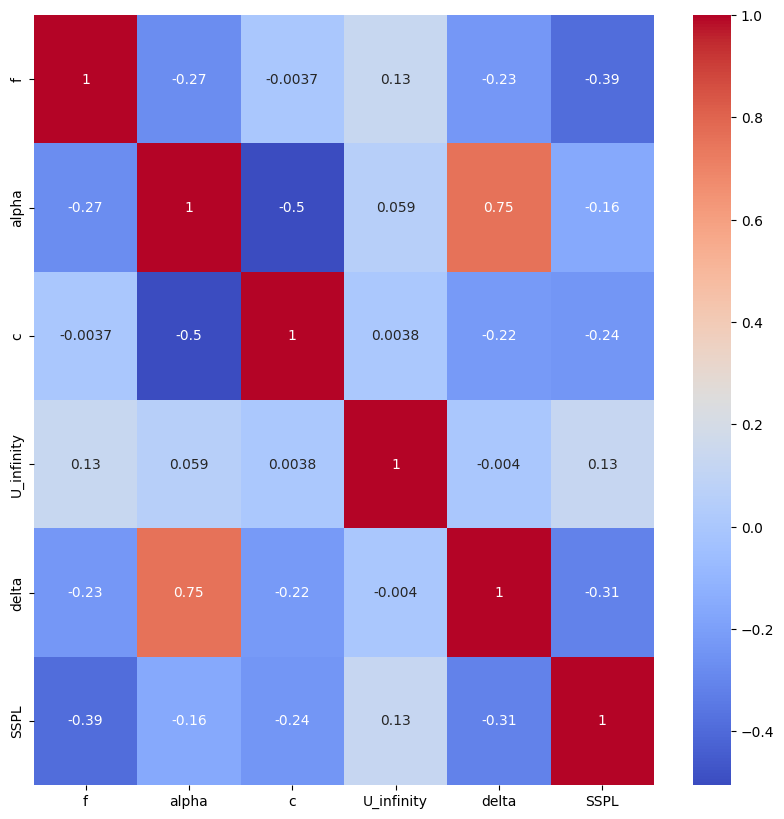

In [ ]:
# Visualize correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# SSPL Basic Stats
print('Mean: ', df['SSPL'].mean())
print('Median: ', df['SSPL'].median())
print('Mode: ', df['SSPL'].mode())
print('Skewness: ', df['SSPL'].skew())

Mean:  124.83594278110448
Median:  125.721
Mode:  0    126.540
1    127.315
2    129.395
Name: SSPL, dtype: float64
Skewness:  -0.4189521877346853


<Figure size 1000x1000 with 0 Axes>

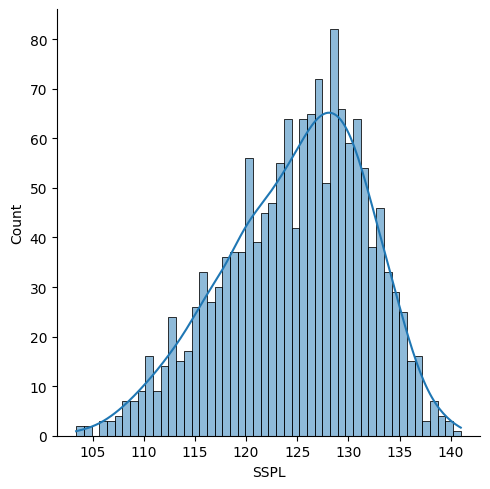

In [ ]:
# Visualize distribution of SSPL
plt.figure(figsize=(10,10))
sns.displot(df['SSPL'], bins=50, kde=True)
plt.show()


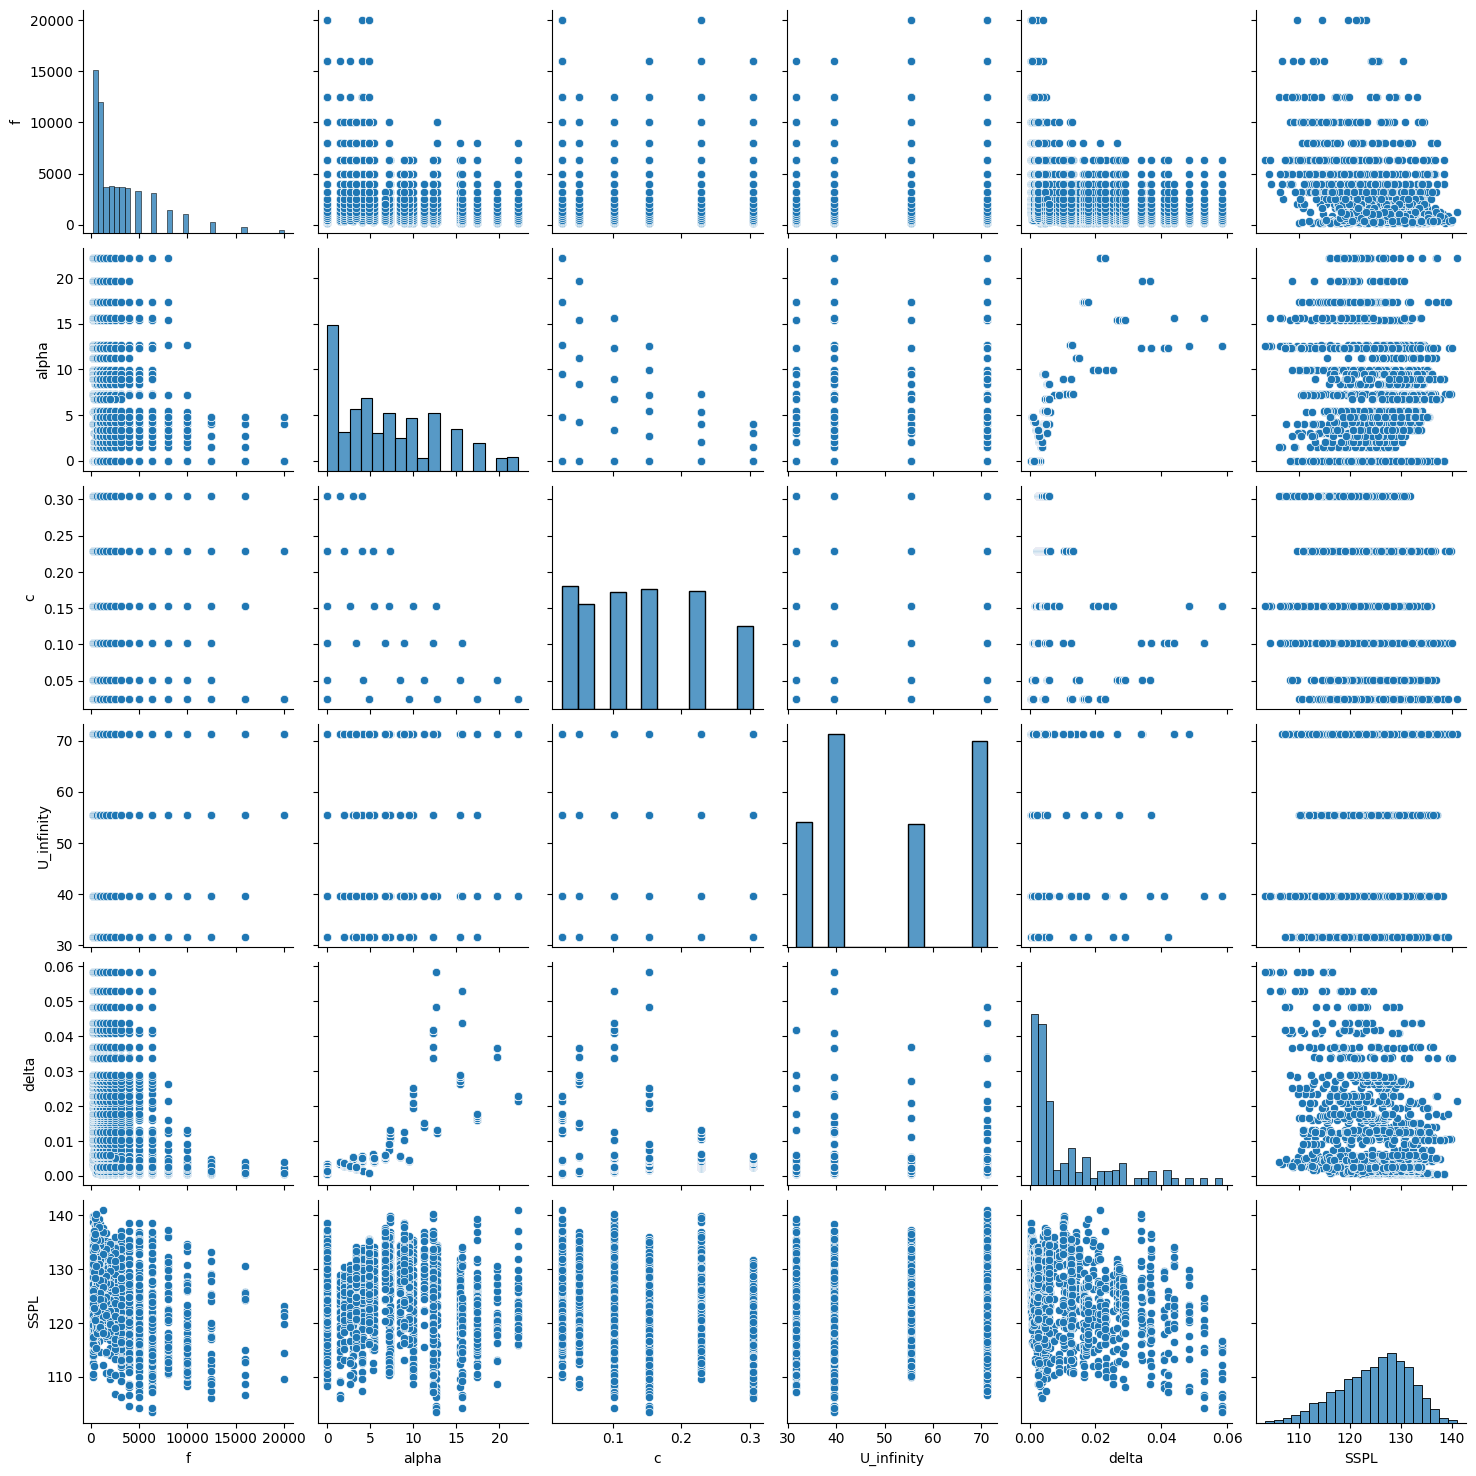

In [ ]:
# Create a pairplot
sns.pairplot(df)
plt.show()

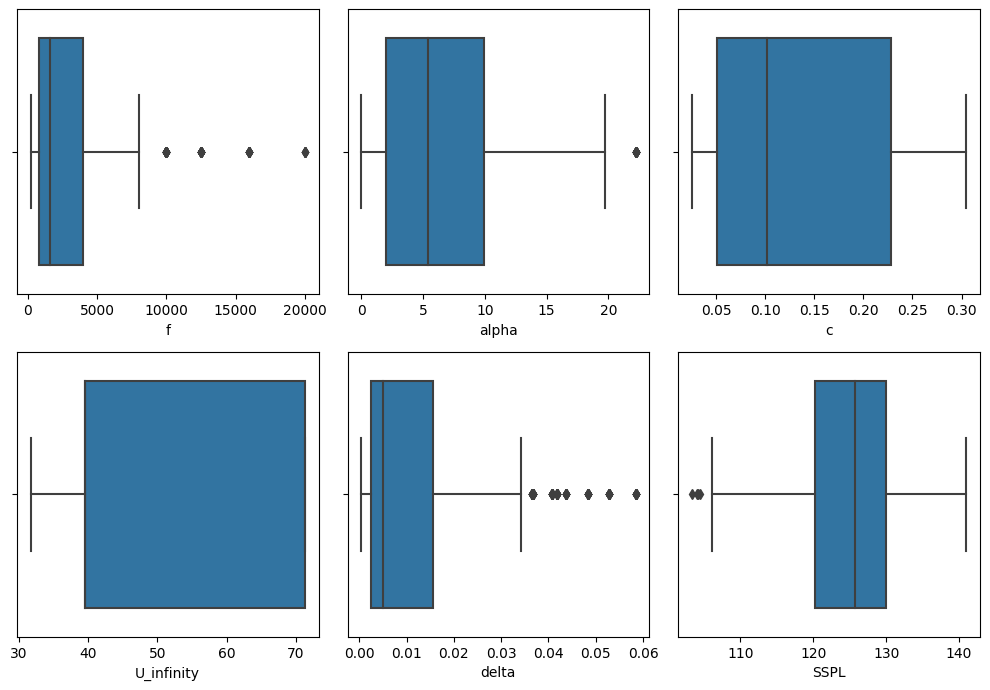

In [ ]:
# Boxplot features
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()
plt.show()


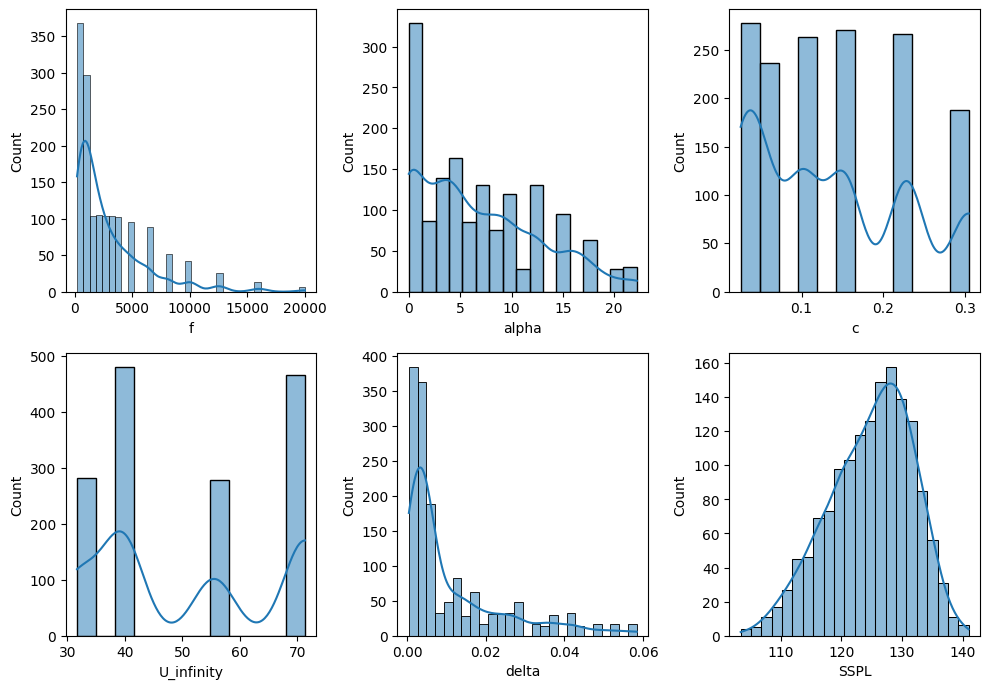

In [ ]:
# Find subgroups in each feature
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
plt.show()


# Feature Engineering

With the lab-generated dataset, there were relatively no issues with the data integrity. Each attribute was represented numerically, eliminating the need to convert categorical data. However, with each attribute representing measurements of various scales, the data point values ranged significantly. To address this, the standard scaler was used as part of the model pipeline, but relevant to mention in this section. The standard scaler helps to standardize the features by removing the mean and scaling to unit variance (Pedregosa et al. 2011). This scaling helped to reduce the bias of a particular feature or set of features that may have been introduced, especially where their values were orders of magnitude larger than others (Pedregosa et al. 2011).

Attempts at additional feature engineering were made by subgrouping data points based on characteristics such as chord length, alpha, and delta.  However, this approach offered minimal improvement as the number of groups exceeded 100 groups. For this reason, the additional subgrouping was removed from the data prep and feature engineering section. With additional resources and domain knowledge, a deeper understanding may have provided additional insight and benefits to the existing dataset. However, the minimal feature engineering allowed for reduced dimensionality and proved to be an effective strategy for the modeling phase.


# Model Exploration #
## Feature Selection ##

In [ ]:
# Set up X and y
X = df.drop('SSPL', axis=1)
y = df['SSPL']

In [ ]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [ ]:
# Create a baseline model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Check the score
print('Baseline Score: ', round(lr.score(X_test, y_test), 2))

Baseline Score:  0.52


In [ ]:
# Define a pipeline for model and hyperparameter exploration
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Parameter grid for GridSearchCV
param_grid = [
    {
        'regressor': [LinearRegression()],
    },
    {
        'regressor': [SVR()],
        'regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'regressor__gamma': ['scale', 'auto']
    },
    {
        'regressor': [DecisionTreeRegressor()],
        'regressor__max_depth': [None, 10, 30, 50],
        'regressor__min_samples_leaf': [1, 2, 4]
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__learning_rate': [0.01, 0.1, 1],
        'regressor__n_estimators': [100, 150, 200]
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [100, 150, 200],
        'regressor__max_depth': [None, 10, 30, 50],
        'regressor__min_samples_leaf': [1, 2, 4]
    }
]

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Fit and predict
grid_search.fit(X_train, y_train)
labels_pred = grid_search.predict( X_test )

# Evaluation
r2 = r2_score(y_test, labels_pred)
print('R2:', round(r2, 2))
print('Best parameters:', grid_search.best_params_)

# The best fitted model
best_model = grid_search.best_estimator_

R2: 0.93
Best parameters: {'regressor': RandomForestRegressor(), 'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__n_estimators': 100}


In [ ]:
# Print the best model, its parameters, and its score
print(best_model)
print("Score:" , round(grid_search.best_score_, 2))
print("Best parameters:" , grid_search.best_params_)
print("Best estimator:" , grid_search.best_estimator_)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])
Score: 0.92
Best parameters: {'regressor': RandomForestRegressor(), 'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__n_estimators': 100}
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])


In [ ]:
importance = best_model.steps[1][1].feature_importances_
sorted_idx = importance.argsort()

for i, j in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {round(j,2)}')


Feature: f, Score: 0.41
Feature: alpha, Score: 0.05
Feature: c, Score: 0.09
Feature: U_infinity, Score: 0.04
Feature: delta, Score: 0.41


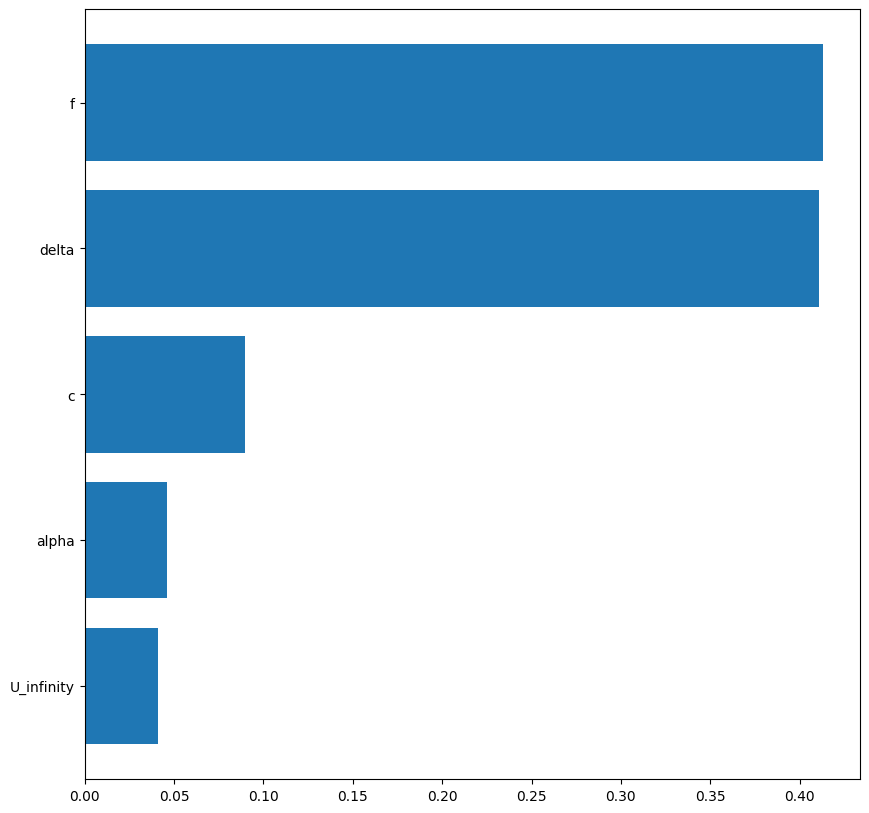

In [ ]:
# Plot feature importance
plt.figure(figsize=(10,10))
plt.barh(X.columns[sorted_idx], importance[sorted_idx])
plt.show()

## Feature Selection Discussion ##

A pipeline was implemented to simultaneously assess multiple regression models with various hyperparameters, with the objective of identifying the optimal hyperparameters and determining feature importance. The evaluation of hyperparameter performance involved comparing R-Squared (R2) and Mean Square Error (MSE). R2 was selected as the preferred metric due to its ability to provide a comprehensive measure of the regression model's quality by capturing the proportion of variance in actual values explained by the model.

Based on the utilization of R2 as the evaluation metric, it was determined that the Random Forest model exhibited the best performance. By selecting suitable hyperparameters, an impressive R2 value of 0.92 was achieved, indicating that the model captures a substantial portion of the variance in the response variable. With a value close to one, the model effectively represents the majority of the observed data.

Additionally, through this pipeline, the importance of the remaining features in the dataset was determined and ranked. The analysis revealed that both "f" (frequency in hertz) and "delta" (suction side displacement thickness in meters) exhibited nearly equal importance, obtaining the highest scores. On the other hand, "alpha" (angle of attack in degrees) and "U_infinity" (free-stream velocity in meters per second) were found to be the least important, with relatively low scores.

Since "alpha" and "delta" seem to a multicollinearity relationship as seen in the correlation heatmap, we've decided to drop "alpha" as "delta" has a higher importance. However, "U_infinity" will remain as it has an importance score of above 0.1, as expressed in the outputted scores.

In [ ]:
X_test = X_test.drop(columns='alpha')
X_train = X_train.drop(columns='alpha')

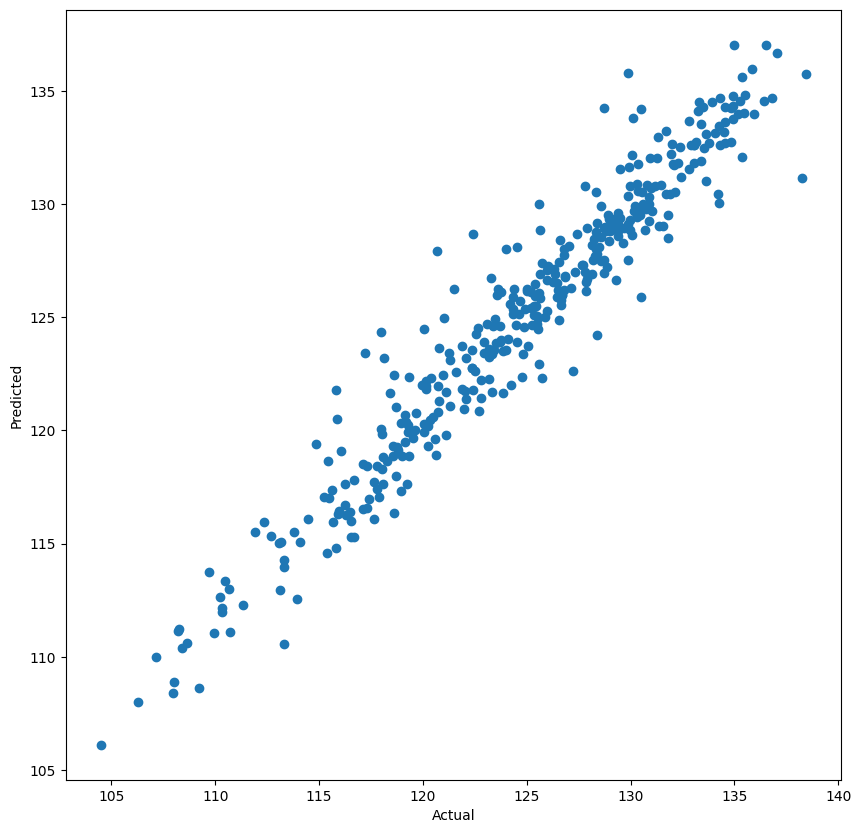

In [ ]:
# Plot the residuals
plt.figure(figsize=(10,10))
plt.scatter(y_test, labels_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Print the States Table of the Models and Hyper-Parameters
results_df = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score').reset_index(drop=True) # Sort by Rank
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,param_regressor__gamma,param_regressor__kernel,param_regressor__max_depth,param_regressor__min_samples_leaf,param_regressor__learning_rate,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.244547,0.028304,0.013298,0.001336,RandomForestRegressor(),NaN,NaN,None,1,NaN,100,"{'regressor': RandomForestRegressor(), 'regres...",0.940163,0.917632,0.915171,0.915106,0.908615,0.919338,0.010834,1
1,0.366225,0.042882,0.017337,0.001737,RandomForestRegressor(),NaN,NaN,30,1,NaN,150,"{'regressor': RandomForestRegressor(), 'regres...",0.937099,0.914156,0.919210,0.916215,0.909381,0.919212,0.009499,2
2,0.384293,0.005281,0.020747,0.002346,RandomForestRegressor(),NaN,NaN,30,1,NaN,200,"{'regressor': RandomForestRegressor(), 'regres...",0.939601,0.910500,0.919652,0.916460,0.907808,0.918804,0.011213,3
3,0.337451,0.057771,0.016311,0.001561,RandomForestRegressor(),NaN,NaN,50,1,NaN,150,"{'regressor': RandomForestRegressor(), 'regres...",0.939076,0.912747,0.918391,0.917845,0.904974,0.918607,0.011312,4
4,0.396349,0.010039,0.019660,0.000486,RandomForestRegressor(),NaN,NaN,50,1,NaN,200,"{'regressor': RandomForestRegressor(), 'regres...",0.937879,0.908740,0.918173,0.918768,0.907446,0.918201,0.010888,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.075695,0.005180,0.001930,0.000046,GradientBoostingRegressor(),NaN,NaN,NaN,NaN,0.01,100,"{'regressor': GradientBoostingRegressor(), 're...",0.510507,0.512630,0.509268,0.460815,0.435484,0.485741,0.031740,62
62,0.027291,0.003007,0.004543,0.000148,SVR(),auto,poly,NaN,NaN,NaN,NaN,"{'regressor': SVR(), 'regressor__gamma': 'auto...",0.457049,0.518298,0.576576,0.487679,0.378486,0.483618,0.065756,63
63,0.027757,0.001947,0.004826,0.000518,SVR(),scale,poly,NaN,NaN,NaN,NaN,"{'regressor': SVR(), 'regressor__gamma': 'scal...",0.457049,0.518298,0.576576,0.487679,0.378486,0.483618,0.065756,63
64,0.046687,0.001507,0.009636,0.000377,SVR(),scale,sigmoid,NaN,NaN,NaN,NaN,"{'regressor': SVR(), 'regressor__gamma': 'scal...",-1.384367,-1.887006,-2.126378,-2.179346,-2.310633,-1.977546,0.326766,65


## Feature Selection Discussion Continued ##

Above, you can observe the table displaying the ranking of the best performing models along with the corresponding hyperparameters utilized to achieve such performance. The Random Forest model occupies the top five positions, while the SVR model is situated at the bottom four. The underperformance of SVR can likely be attributed to an inappropriate kernel selection for the given data. On the other hand, the Gradient Boosted Regressor (GBR) also appears in the bottom five, likely due to a low learning rate. A low learning rate can pose challenges as it slows down the training process by making minuscule updates to the weights. This can potentially lead to non-convergence or result in a suboptimal solution.

## Model Selection ##

The best performing hyperparameters for each model will be extracted from the table and used to perform model analysis.

In [ ]:
# Extract the Best Resulting Hyper Parameters for Each Model
# Get Unique Param Regressors
unique = results_df['param_regressor'].unique()
print(unique)
print()

# Get the First Instance of Each Model in the Results DF to Get the Best Performing Hyper Parameters for that Model
for model in unique:
  idx = (results_df.param_regressor.values == model).argmax()
  print(f'Model: {model}')
  print(results_df.loc[idx]['params'])
  print()

[RandomForestRegressor() GradientBoostingRegressor()
 DecisionTreeRegressor() SVR() LinearRegression()]

Model: RandomForestRegressor()
{'regressor': RandomForestRegressor(), 'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__n_estimators': 100}

Model: GradientBoostingRegressor()
{'regressor': GradientBoostingRegressor(), 'regressor__learning_rate': 0.1, 'regressor__n_estimators': 200}

Model: DecisionTreeRegressor()
{'regressor': DecisionTreeRegressor(), 'regressor__max_depth': 30, 'regressor__min_samples_leaf': 1}

Model: SVR()
{'regressor': SVR(), 'regressor__gamma': 'scale', 'regressor__kernel': 'rbf'}

Model: LinearRegression()
{'regressor': LinearRegression()}



In [ ]:
# Build and Train the Models Using the Tuned Hyper-Parameters for Further Analysis

# Random Forest Regressor
rf = RandomForestRegressor(max_depth=50, min_samples_leaf=1, n_estimators=200)
rf.fit(X_train, y_train)
# Gradient Boosted Regressor
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
gbr.fit(X_train, y_train)
# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=50, min_samples_leaf=1)
dt.fit(X_train, y_train)
# Support Vector Regressor
svr = SVR(gamma='scale', kernel='rbf')
svr.fit(X_train, y_train)
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Decision Tree:


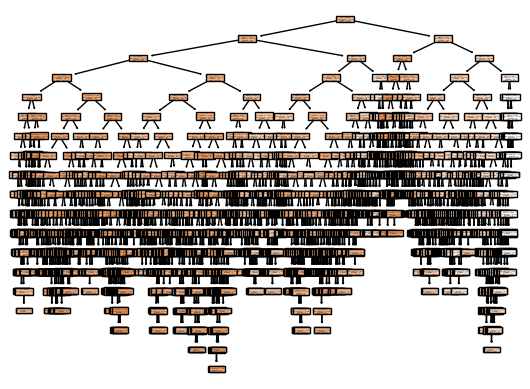

In [ ]:
# Display the Decision Tree
print('Decision Tree:')
tree.plot_tree(dt, filled=True, feature_names=list(X_train.columns))
plt.show()

In [ ]:
# Predict the Y-Values using the X_test set for all Models
y_hat_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

y_hat_gbr = gbr.predict(X_train)
y_pred_gbr = gbr.predict(X_test)

y_hat_dt = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

y_hat_svr = svr.predict(X_train)
y_pred_svr = svr.predict(X_test)

y_hat_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

# Model Evaluation #

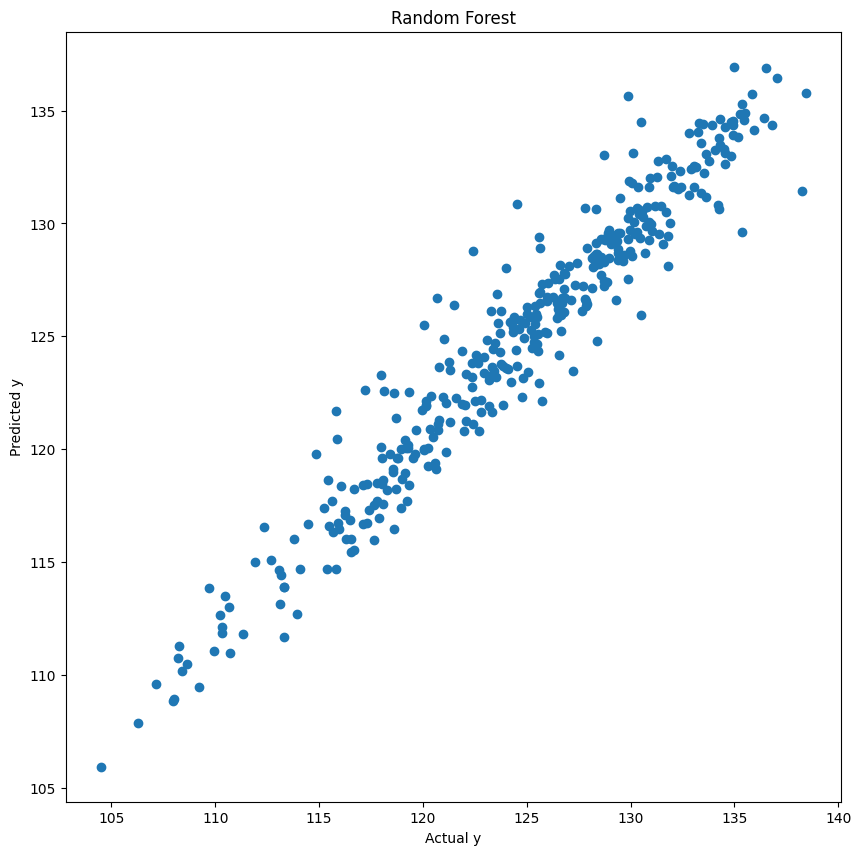

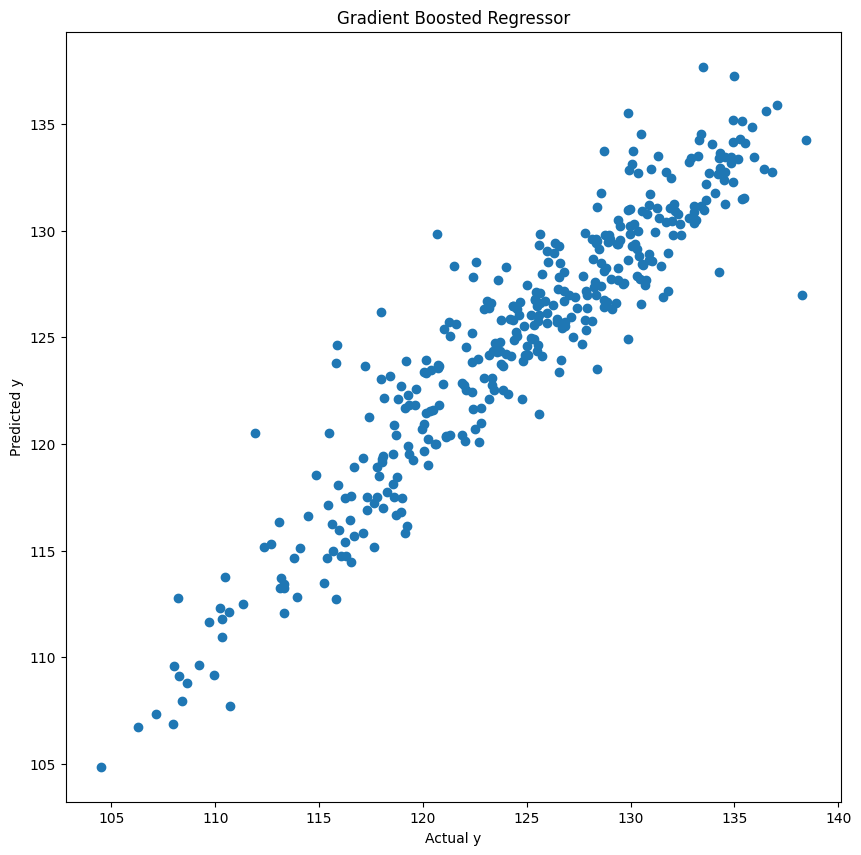

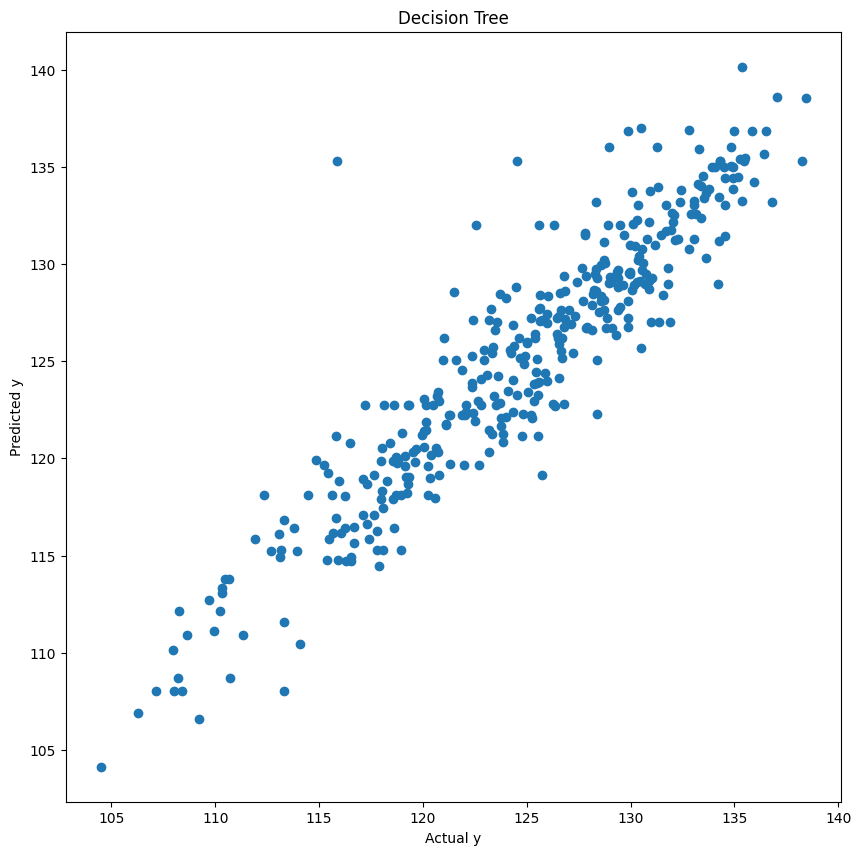

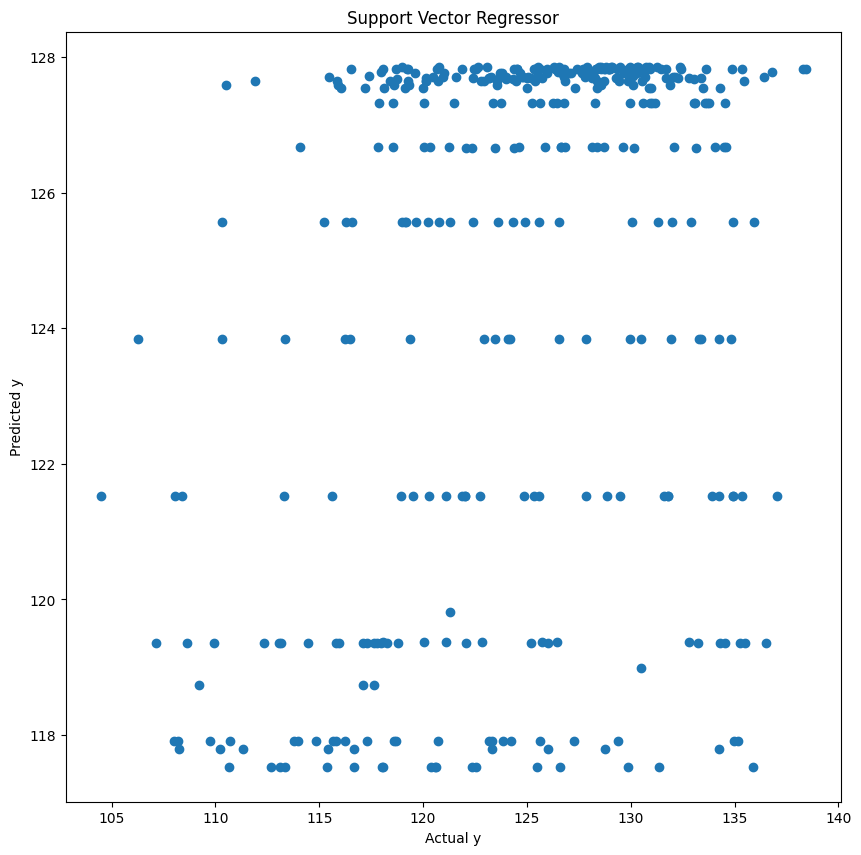

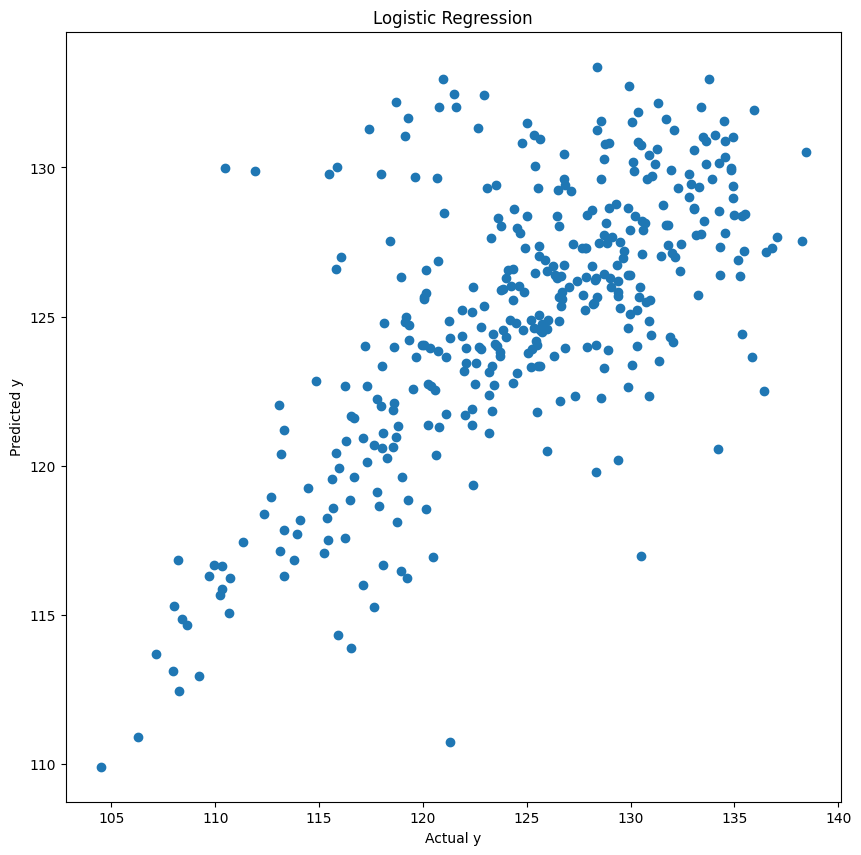

In [ ]:
## Visualize Prediction Errors

## Random Forest
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Random Forest')
plt.show()

## Gradient Boosted Regressor
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_gbr)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Gradient Boosted Regressor')
plt.show()

## Decision Tree
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_dt)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Decision Tree')
plt.show()

## Support Vector Regressor
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Support Vector Regressor')
plt.show()

## Logistic Regression
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Logistic Regression')
plt.show()

## Model Selection (Actual vs. Predicted) Discussion

Using the scatterplot we can visualize the error between the actual y value and the predicted y value using the respective model. Ideally, all the points would be as close as possible to a diagonal line that runs through the graph. The closer the points are to that line the better fit the model is, the farther away from the diagonal line the weaker the fit.

As you can see in the above scatter plots, the best performing models, Random Forest, Gradient Boosted Regressior and Decision Trees, have points that closley resemble a diagonal line. In all of the tree models, error does increase on the larger values of y, however, Random Forest has the smallest error increase of all the models.

Logistic Regression has somewhat of a diagonal shape to it, however, there is a large spread with large errors for increasing y.

The SVR is the worst performing out of all the models and does not have a diagonal shape at all.

Random Forest w/ Top Performing HyperParameters r2 Score:
 0.92


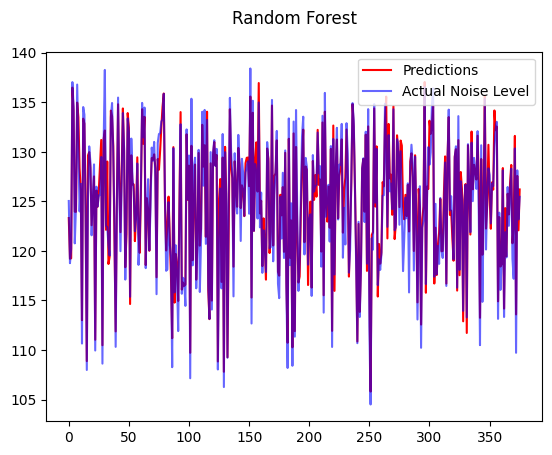


Gradient Boosted Regressor w/ Top Performing HyperParameters r2 Score:
 0.85


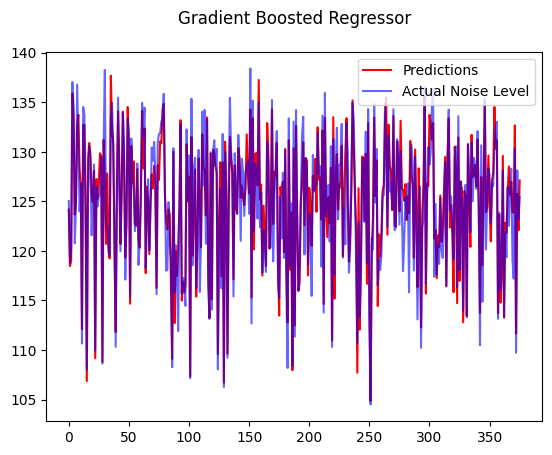


Decision Tree w/ Top Performing HyperParameters r2 Score:
 0.84


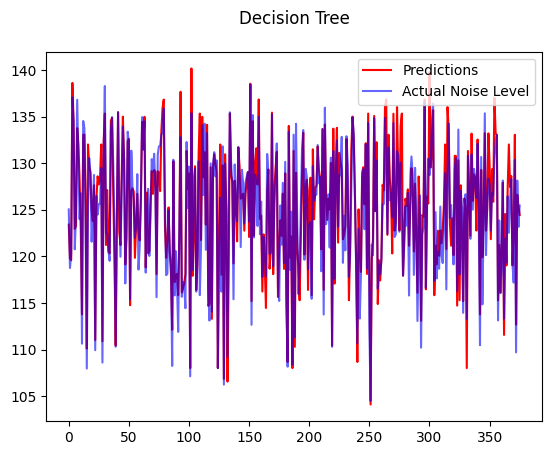


Support Vector Regressor w/ Top Performing HyperParameters r2 Score:
 -1.95


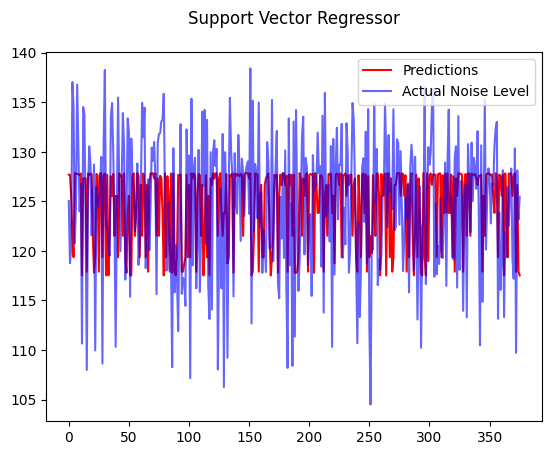


Linear Regression w/ Top Performing HyperParameters r2 Score:
 -0.24


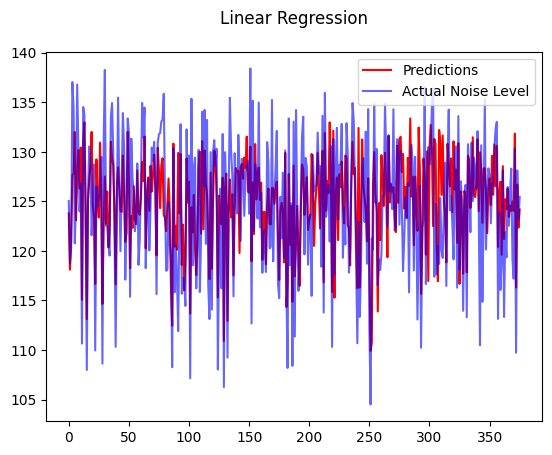

In [ ]:
# Extract the Performance of Each Model Beyond MSE
# Random Forest
plt.plot(range(len(y_pred_rf)), y_pred_rf, c='red', label='Predictions')
plt.plot(range(len(y_test)), y_test, c='blue', alpha=0.6, label='Actual Noise Level')
plt.legend(loc='upper right')
plt.title('Random Forest', pad=20)

print('Random Forest w/ Top Performing HyperParameters r2 Score:\n', round(r2_score(y_pred_rf, y_test), 2))
plt.show()
print()

# Gradient Boosted Regressor
plt.plot(range(len(y_pred_gbr)), y_pred_gbr, c='red', label='Predictions')
plt.plot(range(len(y_test)), y_test, c='blue', alpha=0.6, label='Actual Noise Level')
plt.legend(loc='upper right')
plt.title('Gradient Boosted Regressor', pad=20)

print('Gradient Boosted Regressor w/ Top Performing HyperParameters r2 Score:\n', round(r2_score(y_pred_gbr, y_test), 2))
plt.show()
print()

# Decision Tree
plt.plot(range(len(y_pred_dt)), y_pred_dt, c='red', label='Predictions')
plt.plot(range(len(y_test)), y_test, c='blue', alpha=0.6, label='Actual Noise Level')
plt.legend(loc='upper right')
plt.title('Decision Tree', pad=20)

print('Decision Tree w/ Top Performing HyperParameters r2 Score:\n', round(r2_score(y_pred_dt, y_test), 2))
plt.show()
print()

# Support Vector Regressor
plt.plot(range(len(y_pred_svr)), y_pred_svr, c='red', label='Predictions')
plt.plot(range(len(y_test)), y_test, c='blue', alpha=0.6, label='Actual Noise Level')
plt.legend(loc='upper right')
plt.title('Support Vector Regressor', pad=20)

print('Support Vector Regressor w/ Top Performing HyperParameters r2 Score:\n', round(r2_score(y_pred_svr, y_test), 2))
plt.show()
print()

# Linear Regression
plt.plot(range(len(y_pred_lr)), y_pred_lr, c='red', label='Predictions')
plt.plot(range(len(y_test)), y_test, c='blue', alpha=0.6, label='Actual Noise Level')
plt.legend(loc='upper right')
plt.title('Linear Regression', pad=20)

print('Linear Regression w/ Top Performing HyperParameters r2 Score:\n', round(r2_score(y_pred_lr, y_test), 2))
plt.show()
print()

## Model Evaluation (R2 Performance) Discussion##

The line graphs above depict the predicted and actual y values once again, this time represented by different colors. The red line represents the predicted points, while the light blue line represents the actual values. Areas where the predicted and actual values overlap (shown in purple) indicate points where the predicted value was similar enough to the actual value.

Models that exhibit a significant lack of purple, such as SVR, indicate that the predicted and actual points had little overlap, resulting in a poorly performing R2 score. In the case of SVM, the R2 score is actually a negative number, indicating that this model does not follow the trend of the data. Similarly, Linear Regression also performed poorly and received a negative number for the R2 score.

As expected, Random Forest, Gradient Boosted Regressor, and Decision Tree models performed relatively well, with R2 scores at or above 0.84. This indicates that these models closely follow the trends of the data. Among them, Random Forest performed the best with an impressive R2 score of 0.92. The closer the R2 score is to 1, the better the fit of the model to the data. These models were able to best predict the relationship between the independent variables (features) and the dependent variable (target)

# Model Selection #
After conducting an analysis of different models, we have made the decision to deploy a Random Forest-based model. This model has shown superior performance compared to other models. Additionally, Random Forest is better suited for scaling to larger amounts of data compared to the second best-performing algorithm, Gradient Boosted Regressor. Although our dataset is relatively small, we recognize the importance of computational time when scaling up the data size.

The reason Gradient Boosted Regressors (GBRs) don't perform as well as Random Forests at larger amounts of data is because GBRs perform their trials sequentially, rather than in parallel.

# Model Deployment (Hypothetical) #

Batch Serving

The model does not require real-time updates with new information, as the available predictors do not need to be constantly refreshed. The dataset was accumulated over time, and it will also take time to acquire new data. Considering this constraint, we recommend deploying the model using an offline or "batch learning" approach. This approach allows us to maintain control over the data quality used for model updates. An online approach, on the other hand, poses the risk of negative impacts on the model's performance due to the inclusion of bad data.

To begin the deployment process, we will containerize the trained and tested model. This step ensures that the model operates within a stable, predictable, and immutable environment. Containerization also reduces downtime when performing updates in batches.

Given that the client is the Department of Defense (DoD), it is advisable to embed the model within their systems instead of hosting it on a server. This approach minimizes the risk of unauthorized individuals without security clearance gaining access to the model through potential leaks.

# Conclusion and Recommendations #

In conclusion, our recommendation for the client is to utilize an offline Random Forest model for predicting the SSPL (self-noise level) of an airfoil. This model achieves an impressive R2 score of 0.92 while utilizing four out of the five remaining features. The "alpha" feature was excluded from the model due to its low feature importance and potential multicollinearity concerns. By employing this model, the design process can be streamlined, as simulations of the design can be inputted to obtain an accurate estimation of the SSPL.

# Link GitHub (Update README) #
https://github.com/sglasher/Team4ML


# References

Pedregosa et al. (2011). Scikit-learn: Machine Learning in Python. JMLR 12, pp. 2825-2830
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


T.F. Brooks, D.S. Pope, and A.M. Marcolini. (1989). Airfoil self-noise and prediction.
Technical report, NASA RP-1218.
https://ntrs.nasa.gov/api/citations/19890016302/downloads/19890016302.pdf